In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import env
import explore
import wrangle_zillow


In [2]:
from wrangle_zillow import split

In [3]:
df = wrangle_zillow.wrangle_zillow()

In [4]:
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,3.00,8.00,"2,107.00","6,037.00","34,222,559.00","-118,617,387.00","9,158.00","60,371,132.32","12,447.00",...,"1,972.00","249,655.00","624,139.00","2,016.00","374,484.00","7,659.36",-0.01,2017-07-07,Central,Los_Angeles
10711877,2.00,4.00,8.00,"1,882.00","6,037.00","34,220,261.00","-118,616,409.00","9,035.00","60,371,132.32","12,447.00",...,"1,972.00","253,000.00","660,000.00","2,016.00","407,000.00","8,123.91",0.02,2017-08-29,Central,Los_Angeles
10711888,2.00,4.00,8.00,"1,882.00","6,037.00","34,222,491.00","-118,616,854.00","9,800.00","60,371,132.32","12,447.00",...,"1,972.00","257,591.00","542,923.00","2,016.00","285,332.00","6,673.24",0.08,2017-04-04,Central,Los_Angeles
10711910,2.00,3.00,8.00,"1,477.00","6,037.00","34,221,864.00","-118,615,739.00","11,285.00","60,371,132.32","12,447.00",...,"1,960.00","57,968.00","78,031.00","2,016.00","20,063.00","1,116.46",-0.04,2017-03-17,Central,Los_Angeles
10711923,2.00,4.00,8.00,"1,918.00","6,037.00","34,220,619.00","-118,615,253.00","11,239.00","60,371,132.32","12,447.00",...,"1,960.00","167,869.00","415,459.00","2,016.00","247,590.00","5,239.85",-0.01,2017-03-24,Central,Los_Angeles


In [5]:
df.shape

(69730, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69730 entries, 10711855 to 162960814
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   69730 non-null  float64
 1   bedroomcnt                    69730 non-null  float64
 2   buildingqualitytypeid         69730 non-null  float64
 3   calculatedfinishedsquarefeet  69730 non-null  float64
 4   fips                          69730 non-null  float64
 5   latitude                      69730 non-null  float64
 6   longitude                     69730 non-null  float64
 7   lotsizesquarefeet             69730 non-null  float64
 8   rawcensustractandblock        69730 non-null  float64
 9   regionidcity                  69730 non-null  float64
 10  regionidcounty                69730 non-null  float64
 11  regionidzip                   69730 non-null  float64
 12  roomcnt                       69730 non-null  flo

In [7]:
df.describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
count,"69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00",...,"69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00","69,730.00"
mean,2.25,3.01,6.36,"1,733.35","6,049.32","34,002,589.76","-118,193,526.09","27,639.00","60,496,164.89","33,491.96",...,"96,611.71",1.59,1.00,"1,969.02","180,852.17","466,479.36","2,016.00","285,627.18","5,690.75",0.02
std,0.92,1.00,1.36,874.12,20.84,"268,069.73","360,924.53","119,050.27","206,832.91","46,557.12",...,"3,997.63",2.91,0.00,22.99,"180,610.03","460,563.15",0.00,"329,129.03","5,364.01",0.17
min,1.00,1.00,1.00,360.00,"6,037.00","33,339,527.00","-119,475,265.00",236.00,"60,371,011.10","3,491.00",...,"95,982.00",0.00,1.00,"1,878.00",44.00,"3,254.00","2,016.00",161.00,19.92,-4.66
25%,2.00,2.00,6.00,"1,164.00","6,037.00","33,803,881.25","-118,409,176.75","6,000.00","60,373,115.00","12,447.00",...,"96,206.00",0.00,1.00,"1,954.00","82,869.00","202,716.00","2,016.00","82,283.25","2,665.20",-0.02
50%,2.00,3.00,6.00,"1,507.00","6,037.00","34,013,010.00","-118,163,000.00","7,313.00","60,376,206.01","25,218.00",...,"96,411.00",0.00,1.00,"1,970.00","133,687.00","354,406.00","2,016.00","203,025.00","4,374.20",0.01
75%,3.00,4.00,7.00,"2,048.00","6,059.00","34,174,374.25","-117,913,403.25","10,670.00","60,590,524.18","45,457.00",...,"96,989.00",0.00,1.00,"1,986.00","213,202.00","562,348.75","2,016.00","366,200.00","6,772.72",0.04
max,10.00,11.00,12.00,"12,039.00","6,111.00","34,818,767.00","-117,572,338.00","6,971,010.00","61,110,091.00","396,556.00",...,"399,675.00",14.00,1.00,"2,016.00","3,348,387.00","4,993,132.00","2,016.00","4,847,224.00","142,488.69",3.39


In [8]:
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
county                          0
dtype: int64

In [9]:
train, validate, test = split(df)

In [10]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
parcelid,,,,,,,,,,,,,,,,,,,,,
11858352,2.00,2.00,4.00,"1,009.00","6,037.00","34,051,798.00","-118,094,002.00","8,913.00","60,374,825.21","54,212.00",...,"1,942.00","103,809.00","149,216.00","2,016.00","45,407.00","2,026.32",0.30,2017-05-31,Floor/Wall,Los_Angeles
12973126,1.00,3.00,5.00,"2,520.00","6,037.00","34,125,398.00","-117,977,314.00","24,309.00","60,374,301.02","24,435.00",...,"1,906.00","208,047.00","556,524.00","2,016.00","348,477.00","7,160.29",0.58,2017-01-13,Floor/Wall,Los_Angeles
11462136,4.00,3.00,8.00,"2,933.00","6,037.00","33,967,425.00","-118,419,624.00","6,440.00","60,372,765.00","12,447.00",...,"1,949.00","218,848.00","687,618.00","2,016.00","468,770.00","8,322.18",-0.03,2017-02-22,Central,Los_Angeles
14185846,3.00,5.00,6.00,"1,802.00","6,059.00","33,869,239.00","-117,806,997.00","5,000.00","60,590,218.12","16,764.00",...,"1,969.00","114,089.00","390,018.00","2,016.00","275,929.00","4,507.96",0.05,2017-01-20,None,Orange
17283090,3.00,3.00,6.00,"2,434.00","6,111.00","34,188,665.00","-118,847,985.00","23,559.00","61,110,072.01","34,278.00",...,"1,963.00","410,651.00","821,302.00","2,016.00","410,651.00","8,723.76",-0.05,2017-04-18,None,Ventura


In [11]:
train.shape

(39048, 24)

In [12]:
validate.shape

(16736, 24)

In [13]:
test.shape

(13946, 24)

# 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

# 2. Answer those questions through a mix of statistical tests and visualizations.

## Q1

### - What is the distribution of all variables?

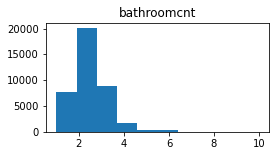

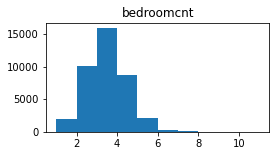

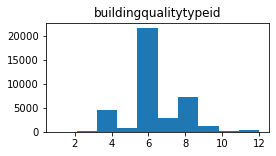

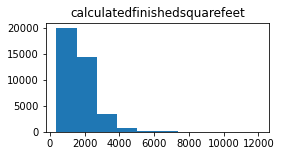

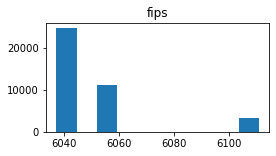

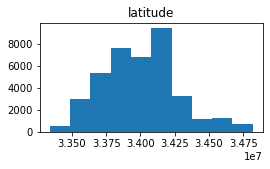

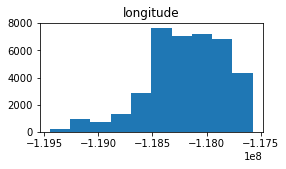

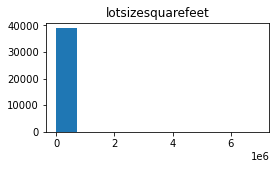

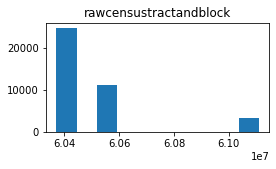

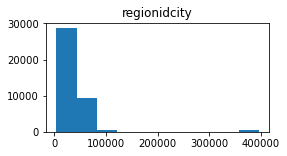

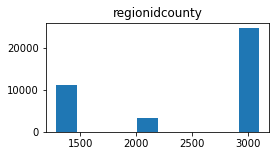

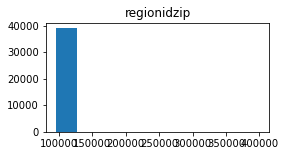

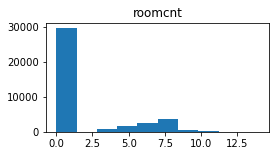

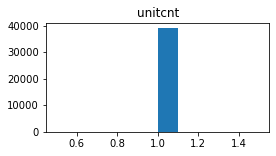

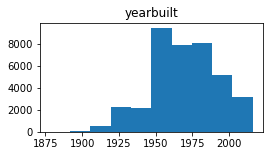

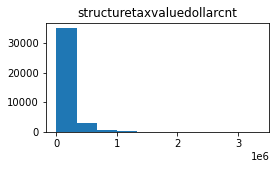

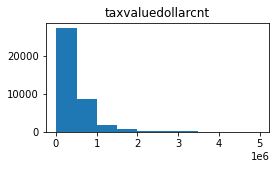

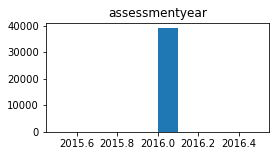

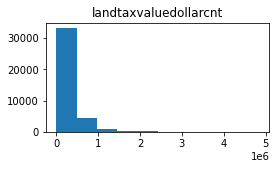

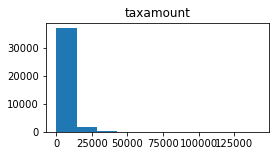

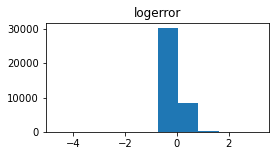

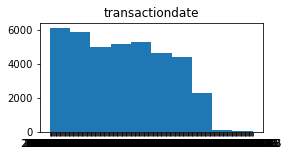

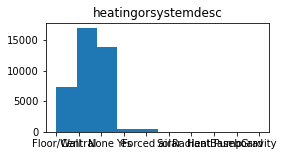

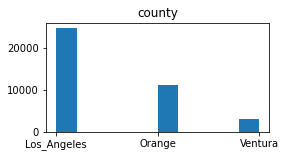

In [14]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [15]:
list(train.columns)

['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'transactiondate',
 'heatingorsystemdesc',
 'county']

In [16]:
cat_vars = ['buildingqualitytypeid', 'fips', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidzip', 'unitcnt', 'assessmentyear', 'heatingorsystemdesc', 'county']

quant_vars = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate']

In [17]:
### takeaways:

## - tax related variables may have outliers

## - most variables skewed to the right

## - yearbuilt skewed to the left however

## Q2

### - Does logerror distrtibution vary by county?

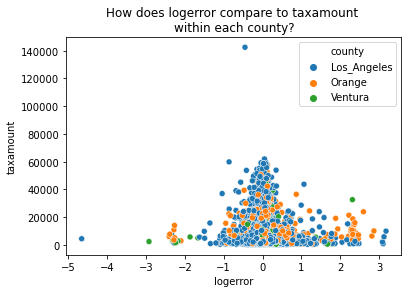

In [18]:
sns.scatterplot(x='logerror', y='taxamount',
               data=train, hue='county')
plt.title("How does logerror compare to taxamount \nwithin each county?")
plt.show()

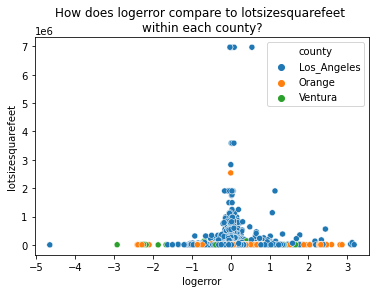

In [19]:
sns.scatterplot(x='logerror', y='lotsizesquarefeet',
               data=train, hue='county')
plt.title("How does logerror compare to lotsizesquarefeet \nwithin each county?")
plt.show()

In [20]:
### takeaways:

## - Los Angeles seems to have the most significant logerrors with lower value homes

## - all counties have larger logerrors the less the home is worth

## - all counties have larger logerror the smaller the home is in sq ft

## Q3

### - Is there a diferrence in logerror for homes in different price brackets?

In [21]:
train.taxamount.median()

4363.79

In [22]:
median = train.taxamount.median()

In [23]:
train['greater_than_median'] = train.taxamount > median

In [24]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,greater_than_median
parcelid,,,,,,,,,,,,,,,,,,,,,
11858352,2.00,2.00,4.00,"1,009.00","6,037.00","34,051,798.00","-118,094,002.00","8,913.00","60,374,825.21","54,212.00",...,"103,809.00","149,216.00","2,016.00","45,407.00","2,026.32",0.30,2017-05-31,Floor/Wall,Los_Angeles,False
12973126,1.00,3.00,5.00,"2,520.00","6,037.00","34,125,398.00","-117,977,314.00","24,309.00","60,374,301.02","24,435.00",...,"208,047.00","556,524.00","2,016.00","348,477.00","7,160.29",0.58,2017-01-13,Floor/Wall,Los_Angeles,True
11462136,4.00,3.00,8.00,"2,933.00","6,037.00","33,967,425.00","-118,419,624.00","6,440.00","60,372,765.00","12,447.00",...,"218,848.00","687,618.00","2,016.00","468,770.00","8,322.18",-0.03,2017-02-22,Central,Los_Angeles,True
14185846,3.00,5.00,6.00,"1,802.00","6,059.00","33,869,239.00","-117,806,997.00","5,000.00","60,590,218.12","16,764.00",...,"114,089.00","390,018.00","2,016.00","275,929.00","4,507.96",0.05,2017-01-20,None,Orange,True
17283090,3.00,3.00,6.00,"2,434.00","6,111.00","34,188,665.00","-118,847,985.00","23,559.00","61,110,072.01","34,278.00",...,"410,651.00","821,302.00","2,016.00","410,651.00","8,723.76",-0.05,2017-04-18,None,Ventura,True


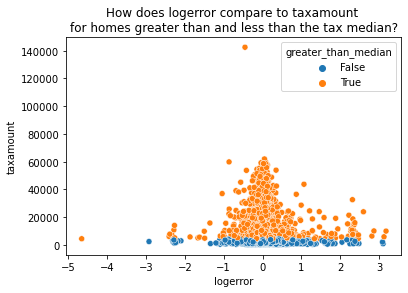

In [25]:
sns.scatterplot(x='logerror', y='taxamount',
               data=train, hue='greater_than_median')
plt.title("How does logerror compare to taxamount \nfor homes greater than and less than the tax median?")
plt.show()

In [26]:
H0 = 'there is no difference in the logerror of houses greater than and less than the tax amount median'

H1 = 'there is a difference in the logerror of houses greater than and less than the tax amount median'

alpha = .05

In [27]:
stats.ttest_ind(train[train.greater_than_median == True].logerror, 
                train[train.greater_than_median == False].logerror,
                equal_var=False
               )

Ttest_indResult(statistic=-1.676478766613854, pvalue=0.09365246215955612)

In [28]:
## p value is greater than alpha, we are unable to reject the null

## Q4

### - Is there a diferrence in logerror for homes in different lot size brackets?

In [29]:
train.lotsizesquarefeet.describe()

count              39,048.00
mean               27,711.01
std               127,832.00
min                   435.00
25%                 6,000.00
50%                 7,313.00
75%                10,672.00
max             6,971,010.00
Name: lotsizesquarefeet, dtype: float64

In [30]:
train['lot_bin'] = pd.cut(train.lotsizesquarefeet, [0, 6000.00, 7313.00, 10672.00, 6971010.00])

In [31]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,greater_than_median,lot_bin
parcelid,,,,,,,,,,,,,,,,,,,,,
11858352,2.00,2.00,4.00,"1,009.00","6,037.00","34,051,798.00","-118,094,002.00","8,913.00","60,374,825.21","54,212.00",...,"149,216.00","2,016.00","45,407.00","2,026.32",0.30,2017-05-31,Floor/Wall,Los_Angeles,False,"(7313.0, 10672.0]"
12973126,1.00,3.00,5.00,"2,520.00","6,037.00","34,125,398.00","-117,977,314.00","24,309.00","60,374,301.02","24,435.00",...,"556,524.00","2,016.00","348,477.00","7,160.29",0.58,2017-01-13,Floor/Wall,Los_Angeles,True,"(10672.0, 6971010.0]"
11462136,4.00,3.00,8.00,"2,933.00","6,037.00","33,967,425.00","-118,419,624.00","6,440.00","60,372,765.00","12,447.00",...,"687,618.00","2,016.00","468,770.00","8,322.18",-0.03,2017-02-22,Central,Los_Angeles,True,"(6000.0, 7313.0]"
14185846,3.00,5.00,6.00,"1,802.00","6,059.00","33,869,239.00","-117,806,997.00","5,000.00","60,590,218.12","16,764.00",...,"390,018.00","2,016.00","275,929.00","4,507.96",0.05,2017-01-20,None,Orange,True,"(0.0, 6000.0]"
17283090,3.00,3.00,6.00,"2,434.00","6,111.00","34,188,665.00","-118,847,985.00","23,559.00","61,110,072.01","34,278.00",...,"821,302.00","2,016.00","410,651.00","8,723.76",-0.05,2017-04-18,None,Ventura,True,"(10672.0, 6971010.0]"


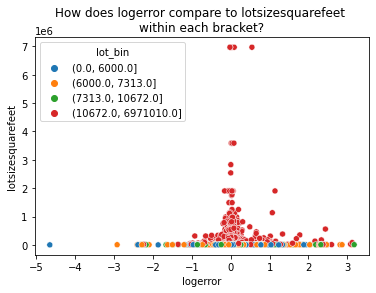

In [32]:
sns.scatterplot(x='logerror', y='lotsizesquarefeet',
               data=train, hue='lot_bin')
plt.title("How does logerror compare to lotsizesquarefeet \nwithin each bracket?")
plt.show()

In [33]:
H0 = '''there is no difference in the logerror between homes in the 4th quartile of lot size 
        and the general population'''

H1 = '''there is a difference in the logerror between homes in the 4th quartile of lot size 
        and the general population'''

alpha = .05

In [34]:
q4 = train[train.lotsizesquarefeet > 10672.00]

In [35]:
q4.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,greater_than_median,lot_bin
parcelid,,,,,,,,,,,,,,,,,,,,,
12973126,1.00,3.00,5.00,"2,520.00","6,037.00","34,125,398.00","-117,977,314.00","24,309.00","60,374,301.02","24,435.00",...,"556,524.00","2,016.00","348,477.00","7,160.29",0.58,2017-01-13,Floor/Wall,Los_Angeles,True,"(10672.0, 6971010.0]"
17283090,3.00,3.00,6.00,"2,434.00","6,111.00","34,188,665.00","-118,847,985.00","23,559.00","61,110,072.01","34,278.00",...,"821,302.00","2,016.00","410,651.00","8,723.76",-0.05,2017-04-18,None,Ventura,True,"(10672.0, 6971010.0]"
11399948,2.00,2.00,7.00,850.00,"6,037.00","33,974,046.00","-118,352,947.00","27,740.00","60,376,009.02","45,888.00",...,"101,143.00","2,016.00","20,221.00","1,410.53",0.02,2017-06-06,Central,Los_Angeles,False,"(10672.0, 6971010.0]"
12530443,2.00,2.00,6.00,"1,028.00","6,037.00","33,771,600.00","-118,120,000.00","559,649.00","60,375,776.03","46,298.00",...,"340,000.00","2,016.00","200,000.00","4,131.97",-0.02,2017-09-11,Central,Los_Angeles,False,"(10672.0, 6971010.0]"
11044357,2.00,2.00,8.00,889.00,"6,037.00","34,234,900.00","-118,472,000.00","17,774.00","60,371,174.05","12,447.00",...,"75,287.00","2,016.00","15,052.00",975.56,-0.15,2017-08-11,Central,Los_Angeles,False,"(10672.0, 6971010.0]"


In [36]:
t, p = stats.ttest_1samp(q4.logerror, train.logerror.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

if p < alpha:
    print(H1)
else:
    print(H0)

t = 2.069
p = 0.039
there is a difference in the logerror between homes in the 4th quartile of lot size 
        and the general population


## Q5

### - Is the age of a home related to logerror?

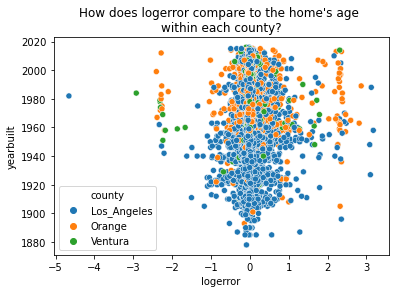

In [37]:
sns.scatterplot(x='logerror', y='yearbuilt',
               data=train, hue='county')
plt.title("How does logerror compare to the home's age \nwithin each county?")
plt.show()

In [38]:
## it looks like the older a home is the smaller the range of logerrors 

In [39]:
H0 = 'there is no correlation between the age of a home and the logerror'

H1 = 'there is a correlation between the age of a home and the logerror'

alpha = .05

In [40]:
corr, p = stats.pearsonr(train.yearbuilt, train.logerror)
corr, p


(0.009315712370888839, 0.06564814988734904)

In [41]:
## p value is slightly too high, we are unable to reject the null hypothesis

# Bonus

### Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [42]:
logerror_mean = train.logerror.mean()

logerror_mean

0.01614816514664341

In [43]:
train.regionidzip.value_counts()

97,319.00    450
96,987.00    427
97,318.00    405
97,118.00    351
96,993.00    341
            ... 
97,108.00      3
96,329.00      2
97,111.00      1
96,467.00      1
96,039.00      1
Name: regionidzip, Length: 385, dtype: int64

In [44]:
unique_zips = list(train.regionidzip.unique())

In [61]:
unique_zips = pd.DataFrame(unique_zips)

In [64]:
unique_zips = unique_zips.rename(columns={0: 'zip'})

In [65]:
unique_zips.head()

,zip
0,"96,510.00"
1,"96,270.00"
2,"96,026.00"
3,"97,026.00"
4,"96,385.00"


In [66]:
for unique_zip in unique_zips['zip']:
    zip_bin = train[train.regionidzip == unique_zip]
    unique_zip['logerror_means'] = zip_bin.logerror.mean()

TypeError: 'float' object does not support item assignment

In [59]:
logerror_means